### Machine Failure-Predictions

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [17]:
s=df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Separate X and Y

In [18]:
X=df.drop(columns=['id','Product ID','Machine failure'])
Y=df[['Machine failure']]

In [19]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [20]:
X.value_counts()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF
L     300.9                310.7                    1412                    57.5         16               0    0    0    0    0      35
      300.7                311.0                    1413                    52.0         91               0    0    0    0    0      15
      297.3                308.1                    1566                    31.1         154              0    0    0    0    0      11
      298.6                309.8                    1505                    45.7         144              0    0    0    0    0      11
M     301.4                311.0                    1334                    53.3         157              0    0    0    0    0       9
                                                                                                                                     ..
L     299.1                308.0                    13

In [21]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [22]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Separate cat and con features for X

In [23]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [24]:
cat

['Type']

In [25]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a preprocessing Pipeline-Feature Selection

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [27]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ordinal',OrdinalEncoder())])

pre=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [28]:
X_pre=pre.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [29]:
cols=pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [30]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


### Mutual information Score

In [31]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_pre,Y)
mi

array([0.0053232 , 0.0026031 , 0.01924191, 0.01991209, 0.00677223,
       0.00796348, 0.02415775, 0.01087198, 0.01906659, 0.00123755,
       0.01096179])

In [33]:
mi=pd.Series(mi)
mi.index=X_pre.columns
mi=mi.sort_values(ascending=False)
mi

num__HDF                        0.024158
num__Torque [Nm]                0.019912
num__Rotational speed [rpm]     0.019242
num__OSF                        0.019067
cat__Type                       0.010962
num__PWF                        0.010872
num__TWF                        0.007963
num__Tool wear [min]            0.006772
num__Air temperature [K]        0.005323
num__Process temperature [K]    0.002603
num__RNF                        0.001238
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

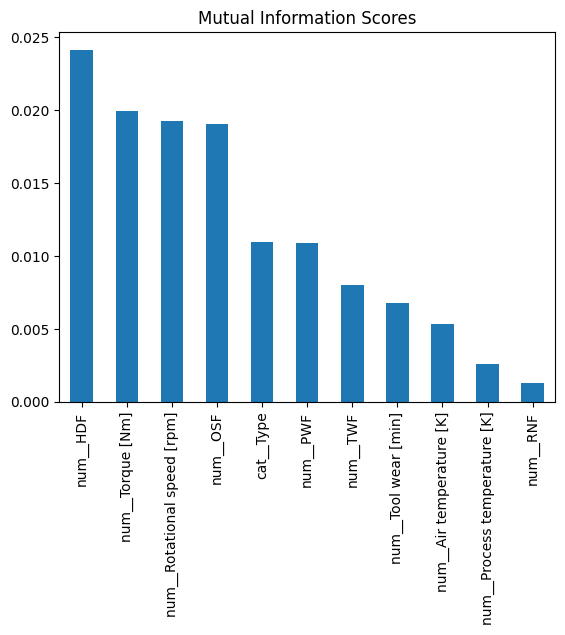

In [34]:
mi.plot(kind='bar',title='Mutual Information Scores')

### Create a final pipeline

In [35]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [36]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre1=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [37]:
X_pre1=pre1.fit_transform(X)
X_pre1

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [38]:
final_cols=pre1.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [ ]:
X_pre1=pd.DataFrame(X_pre1,columns=final_cols)
X_pre1

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre1,Y,test_size=0.3,random_state=42)

In [40]:
xtrain.shape

(95500, 13)

In [41]:
xtest.shape

(40929, 13)

### Algorithm Evaluation

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [43]:
dct={'Logistic':LogisticRegression(),
'Decision Tree':DecisionTreeClassifier(),
'Random Forest':RandomForestClassifier(),
'Gradient Boost':GradientBoostingClassifier()}

In [44]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [45]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr=[]
tr_cv=[]
ts=[]
for name,model  in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict train and test results
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    # Calculate F1 score in training
    f1_tr=f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)
    # Calculate f1 score in train Cross Validated
    scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_cv=scores.mean()
    tr_cv.append(f1_cv)
    # Calculate f1 score in testing
    f1_ts=f1_score(ytest,ypred_ts)
    ts.append(f1_ts)
    # Print the results for model
    print(f'Model Name:{name}\n')
    print(f'Training F1:{f1_tr:.4f}')
    print(f'Training F1 CV :{f1_cv:.4f}')
    print(f'Testing F1:{f1_ts:.4f}')
    print('\n======================================================\n')


Model Name:Logistic

Training F1:0.8657
Training F1 CV :0.8656
Testing F1:0.8564


Model Name:Decision Tree

Training F1:0.9950
Training F1 CV :0.7556
Testing F1:0.7211


Model Name:Random Forest

Training F1:0.9947
Training F1 CV :0.8585
Testing F1:0.8579


Model Name:Gradient Boost

Training F1:0.8788
Training F1 CV :0.8617
Testing F1:0.8610




In [46]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [47]:
eval_dct={'Model_name':list(dct.keys()),'Train F1':tr,'Test F1':ts,'Train F1 CV':tr_cv}

In [48]:
eval_df=pd.DataFrame(eval_dct)
eval_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.865749,0.856373,0.865645
1,Decision Tree,0.995031,0.721068,0.755580
2,Random Forest,0.994705,0.857909,0.858464
3,Gradient Boost,0.878766,0.860963,0.861674


In [ ]:
eval_df.sort_values(by='Test F1',ascending=False)

,Model_name,Train F1,Test F1,Train F1 CV
3,Gradient Boost,0.878766,0.860963,0.862945
2,Random Forest,0.995041,0.857909,0.859191
0,Logistic,0.865749,0.856373,0.865645
1,Decision Tree,0.995031,0.735338,0.751472


### Create and tune Gradient Boost

In [49]:
params={'learning_rate':[0.01, 0.1, 0.15, 0.2],
          'n_estimators':[10, 20, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          'min_samples_split':[3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbc=GradientBoostingClassifier()
rscv=RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='f1_macro')

In [51]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'max_depth': 9,
 'learning_rate': 0.01}

In [52]:
rscv.best_score_

0.9287495232856602

In [53]:
best_gbc=rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, max_depth=9, min_samples_split=4)

In [54]:
best_gbc.score(xtrain,ytrain)

0.9964816753926702

In [55]:
best_gbc.score(xtest,ytest)

0.9958708983850082

### Predict results in train and test

In [56]:
ypred_tr=best_gbc.predict(xtrain)

In [57]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [58]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [59]:
ypred_ts=best_gbc.predict(xtest)

In [60]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [61]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Plotting the ROC-AUC curve in train and test

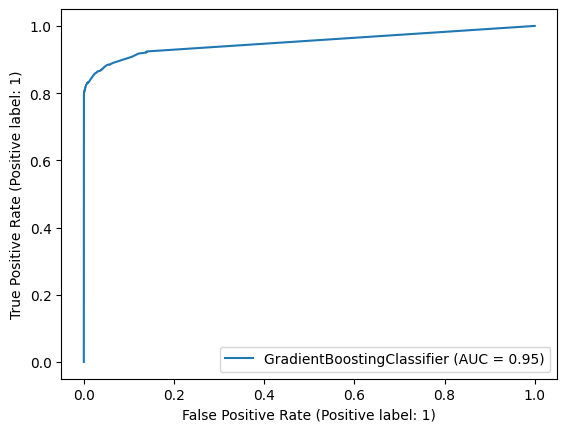

In [62]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_gbc,xtrain,ytrain)

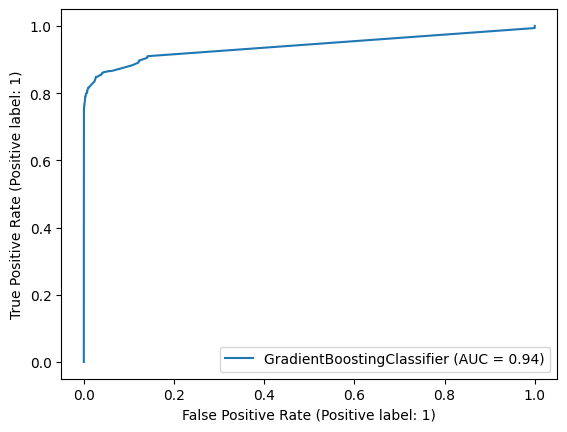

In [63]:
RocCurveDisplay.from_estimator(best_gbc,xtest,ytest)

In [77]:
xnew=pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [78]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [81]:
xnew_pre=pre1.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [82]:
xnew_pre=pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()


,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [83]:
preds=best_gbc.predict(xnew_pre)

In [84]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
prob=best_gbc.predict_proba(xnew_pre)[:,1]
prob

array([0.00705251, 0.00705251, 0.00705251, ..., 0.00705251, 0.00705251,
       0.00705251])

### Save this predictions in DataFrame

In [88]:
df_final=xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [89]:
df_final['MachineFailure_pred']=preds

In [90]:
df_final['MachineFailure_prob']=prob
df_final

,id,MachineFailure_pred,MachineFailure_prob
0,136429,0,0.007053
1,136430,0,0.007053
2,136431,0,0.007053
3,136432,0,0.007053
4,136433,0,0.007053
...,...,...,...
90949,227378,0,0.007053
90950,227379,0,0.007053
90951,227380,0,0.007053
90952,227381,0,0.007053


### Save results to csv

In [91]:
df_final.to_csv('Results.csv',index=False)

In [92]:
df_final['MachineFailure_pred'].value_counts()

MachineFailure_pred
0    89859
1     1095
Name: count, dtype: int64

<Axes: xlabel='MachineFailure_pred'>

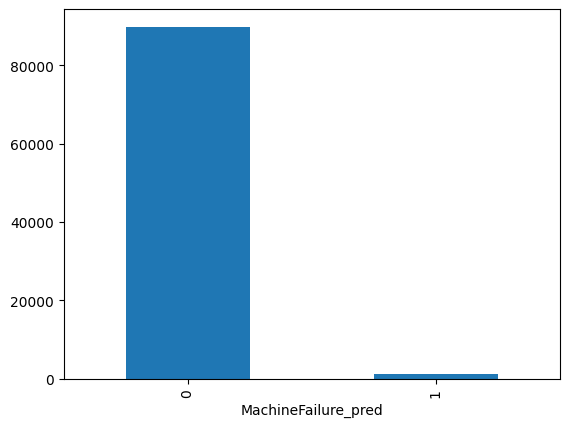

In [93]:
df_final['MachineFailure_pred'].value_counts().plot(kind='bar')